In [62]:
import pickle
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [187]:
class Bruh(nn.Module):
    def __init__(self):
        super(Bruh, self).__init__()
        self.c = nn.Conv1d(1, 4, 3, stride=1)
        self.gp = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(4, 1)
    def forward(self, x):
        x = self.c(x)
        x = self.gp(x)
        x = x.squeeze()
        x = self.fc(x)
        return x

In [188]:
for protein_id in ['T1024', 'T1038']:
    X = pickle.load(open(f'./pkls/X-{protein_id}.pkl', 'rb'))
    y = pickle.load(open(f'./pkls/y-{protein_id}.pkl', 'rb'))
    X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
    y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    train_dataset = TensorDataset(X, y)
for protein_id in ['T1030', 'T1028']:
    X = pickle.load(open(f'./pkls/X-{protein_id}.pkl', 'rb'))
    y = pickle.load(open(f'./pkls/y-{protein_id}.pkl', 'rb'))
    X = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
    y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    test_dataset = TensorDataset(X, y)

trainloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [189]:
model = Bruh()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

losses = []
test_losses = []
for epoch in range(25):
    losses_ = []
    for X,y in trainloader:
        y_pred = model(X)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses_.append(loss.item())
    losses.append(sum(losses_) / len(losses_))

    test_losses_ = []
    for X,y in testloader:
        y_pred = model(X)
        loss = criterion(y_pred, y)
        test_losses_.append(loss.item())
    test_losses.append(sum(test_losses_) / len(test_losses_))

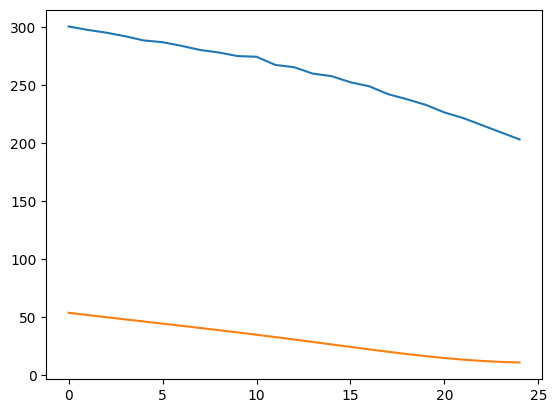

In [190]:
plt.plot(losses[:30])
plt.plot(test_losses[:30])

0.06081319817419232

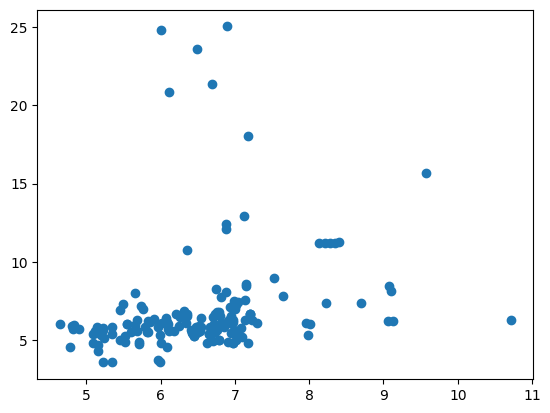

In [194]:
y_pred = model(test_dataset.tensors[0])
plt.scatter(y_pred.detach().numpy(), test_dataset.tensors[1].numpy())
from scipy.stats import linregress
linregress(y_pred.detach().numpy().squeeze(), test_dataset.tensors[1].numpy().squeeze()).rvalue**2